In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('C:/Users/Nikose/Desktop/loan prediction/train.csv')
test = pd.read_csv('C:/Users/Nikose/Desktop/loan prediction/test.csv')

In [3]:
test1 = pd.read_csv('C:/Users/Nikose/Desktop/loan prediction/test.csv')

In [230]:
test['Loan_ID'] = test1['Loan_ID'] 

In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


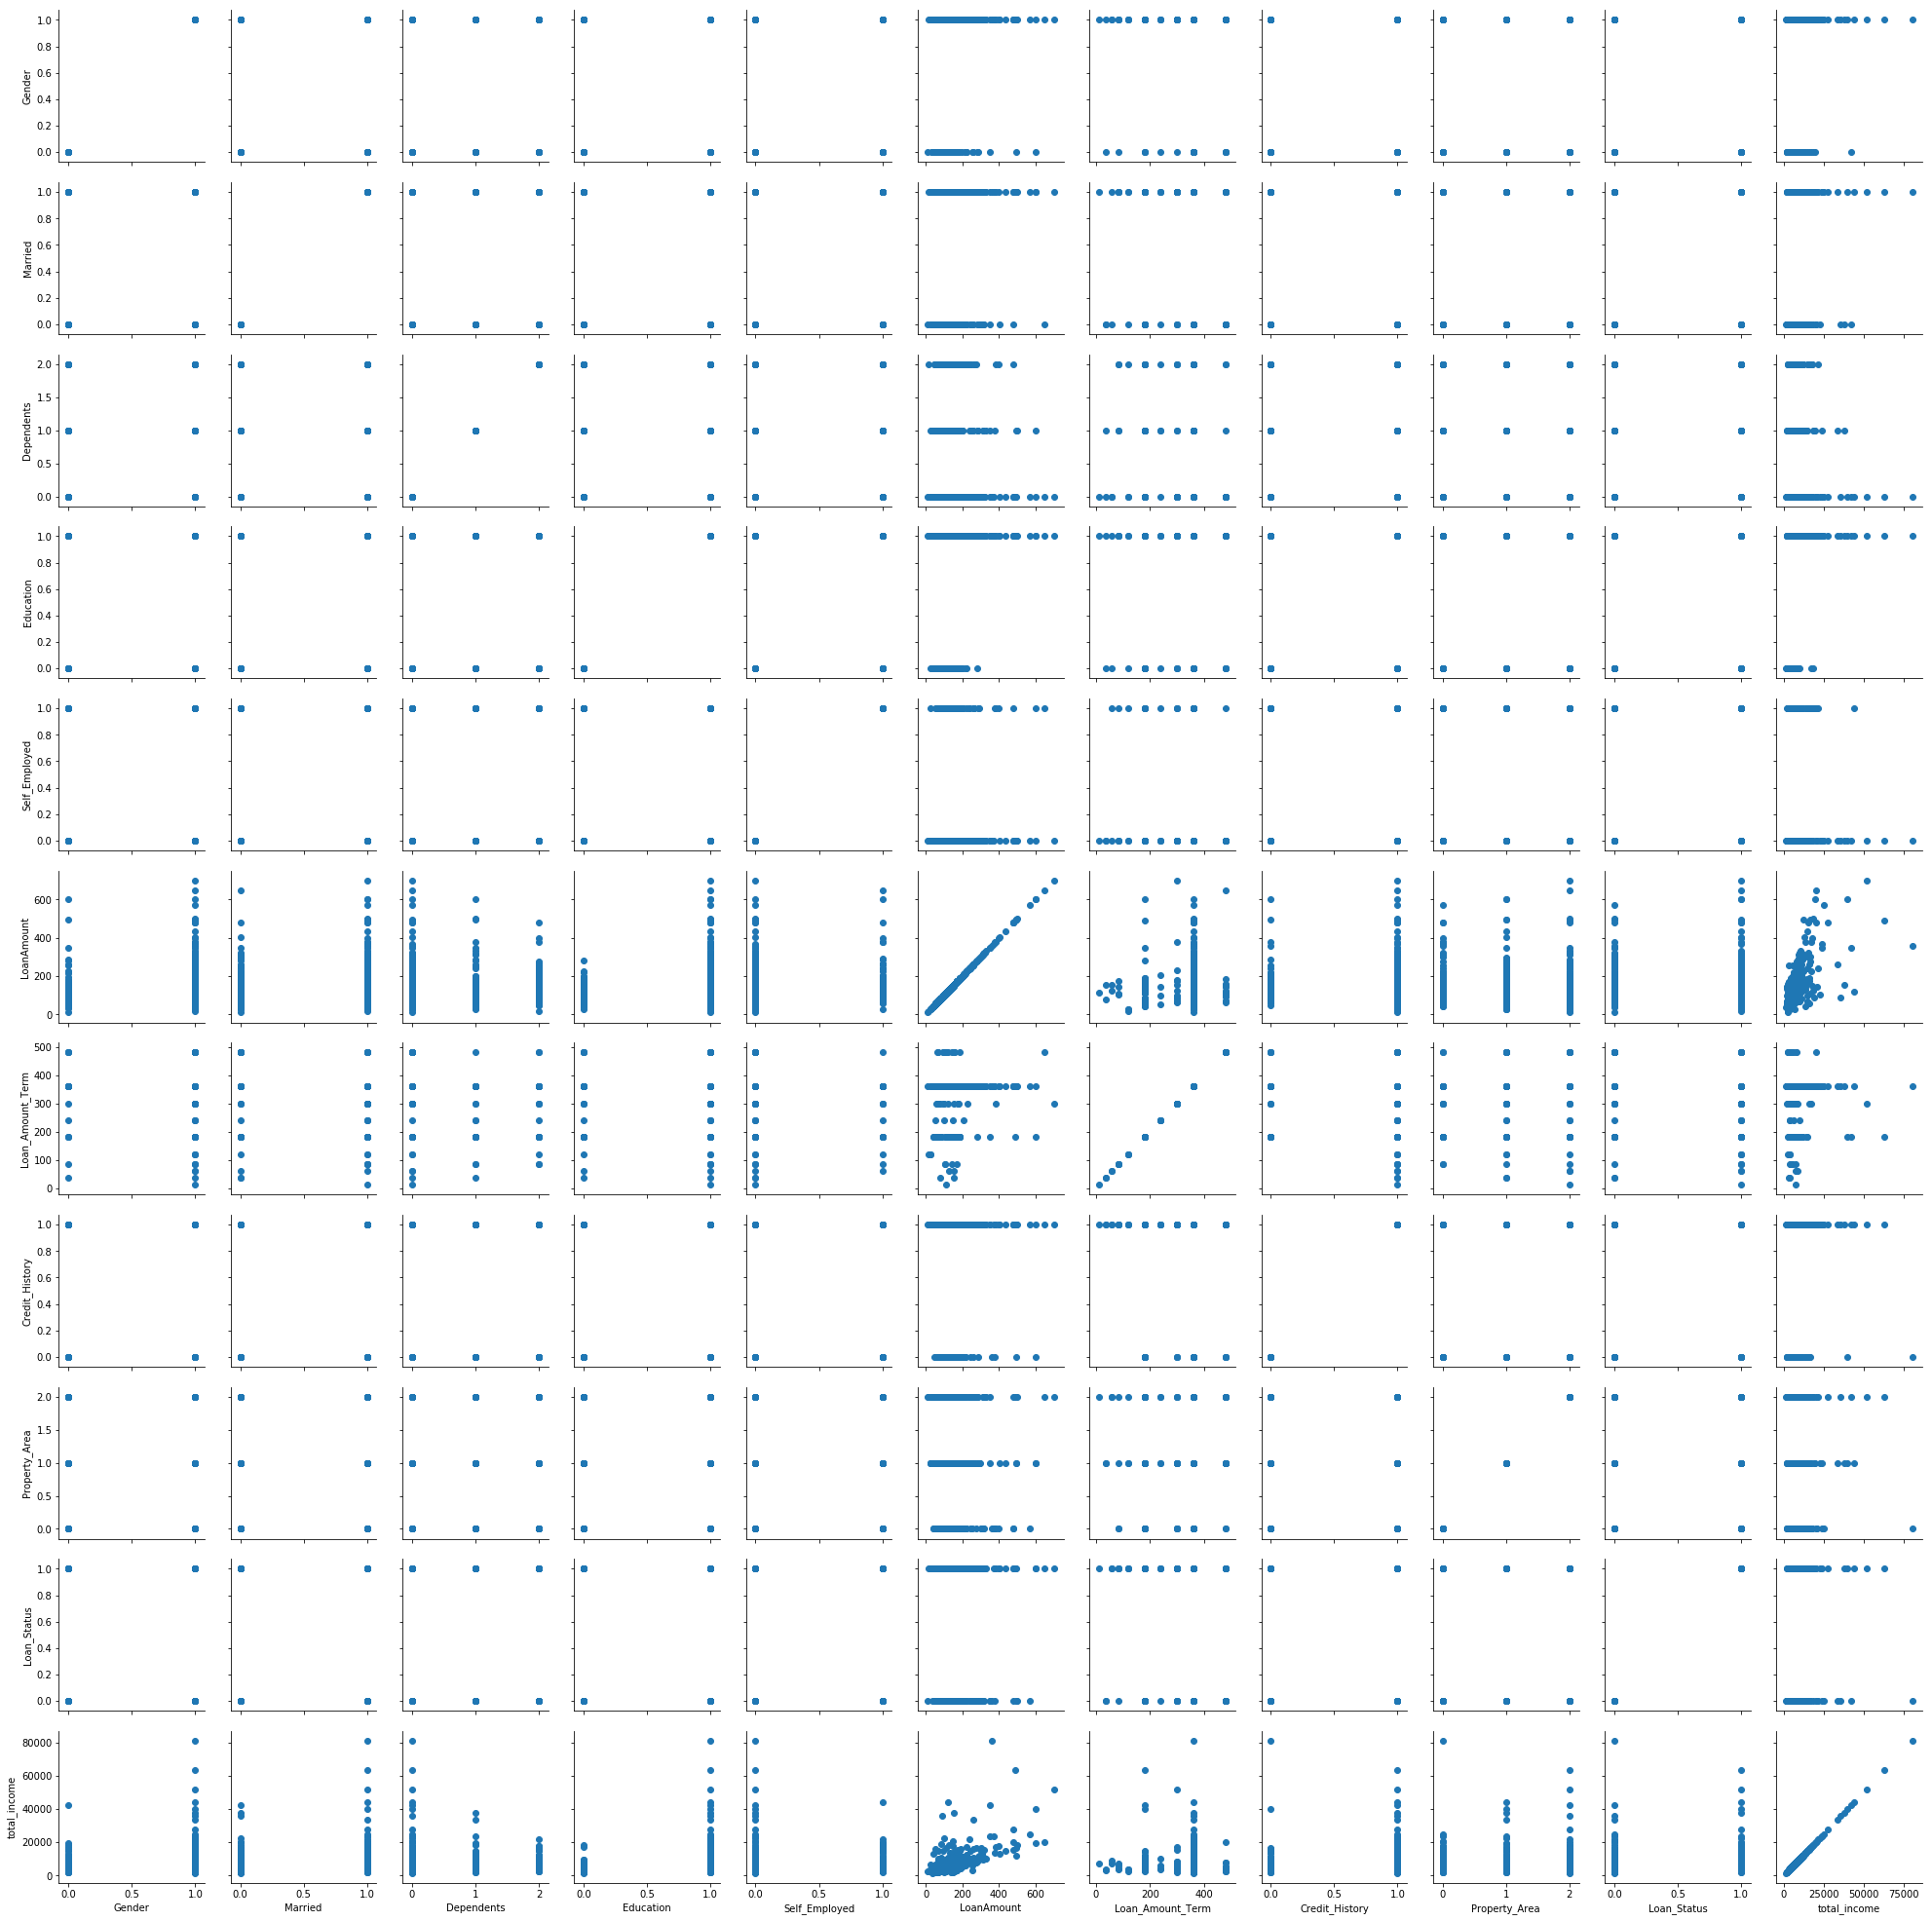

In [96]:
x = sns.PairGrid(train1)
x = x.map(plt.scatter)

In [6]:
combine = [train,test]

In [7]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [8]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
train = train.drop(['Loan_ID'], axis=1)
combine = [train, test]
train.shape, test.shape

((614, 12), (367, 12))

In [10]:
train['Gender'].value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [11]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
from numpy import median

In [13]:
test['Married'].mode()

0    Yes
dtype: object

In [14]:
train['Gender'].fillna(value = 'Male',inplace = True)
test['Gender'].fillna(value = 'Male',inplace = True)
combine = [train,test]

In [15]:
for dataset in combine:
    dataset['Gender'] = dataset['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)



In [16]:
train['Married'].fillna(value = 'Yes',inplace = True)
test['Married'].fillna(value = 'Yes',inplace = True)
combine = [train,test]

In [17]:
for dataset in combine:
    dataset['Married'] = dataset['Married'].map( {'No': 0, 'Yes': 1} ).astype(int)



In [18]:
train['Dependents'].value_counts(dropna = False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [19]:
train['Dependents'].fillna(value = 0,inplace = True)
test['Dependents'].fillna(value = 0,inplace = True)
combine = [train,test]

In [20]:
for dataset in combine:
    dataset['Education'] = dataset['Education'].map( {'Graduate': 1, 'Not Graduate': 0} ).astype(int)



In [21]:
train['Self_Employed'].fillna(value = 'No',inplace = True)
test['Self_Employed'].fillna(value = 'No',inplace = True)
combine = [train,test]

In [22]:
for dataset in combine:
    dataset['Self_Employed'] = dataset['Self_Employed'].map( {'No': 0, 'Yes': 1} ).astype(int)



In [23]:
for dataset in combine:
    dataset['Property_Area'] = dataset['Property_Area'].map( {'Rural': 0, 'Semiurban': 1,'Urban':2} ).astype(int)

train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,Y
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y


In [24]:
train['LoanAmount'].fillna(value =train['LoanAmount'].mean(),inplace = True)
test['LoanAmount'].fillna(value = test['LoanAmount'].mean(),inplace = True)
combine = [train,test]

In [25]:
train['Loan_Amount_Term'].fillna(value =360.0,inplace = True)
test['Loan_Amount_Term'].fillna(value = 360.0,inplace = True)
combine = [train,test]

In [26]:
train['Credit_History'].fillna(value =1.0,inplace = True)
test['Credit_History'].fillna(value = 1.0,inplace = True)
combine = [train,test]

In [91]:
train1 = train


In [100]:
X_train['total_income'] = X_train['ApplicantIncome'] + X_train['CoapplicantIncome']

In [97]:
X_train['total_income'] = X_train['ApplicantIncome'] + X_train['CoapplicantIncome']
test['total_income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
combine = [train,test]

In [106]:
test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,1,1,0.0,1,0,0,110.0,360.0,1.0,2,5720
1,1,1,1.0,1,0,1500,126.0,360.0,1.0,2,4576


In [107]:



X_train = X_train.drop(['CoapplicantIncome'],axis =1)
test = test.drop(['CoapplicantIncome'],axis = 1)
combine = [train,test]

In [27]:
train['Dependents'] = pd.to_numeric(train['Dependents'], errors='coerce')
test['Dependents'] = pd.to_numeric(test['Dependents'], errors='coerce')

In [28]:
train['Loan_Status'].dtype

dtype('O')

In [115]:
X_train['Loan_Amount_Term'] = train['Loan_Amount_Term']/12

In [114]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term']/12

In [29]:
X_train = train.drop("Loan_Status", axis=1)
Y_train = train["Loan_Status"]

X_train.shape, Y_train.shape, test.shape

((614, 11), (614,), (367, 12))

In [30]:
X_train = train.drop("Loan_Status", axis=1)

In [31]:
train['Loan_Status'] = train['Loan_Status'].map( {'N': 0, 'Y': 1} ).astype(int)

In [32]:
Y_train = train["Loan_Status"]

In [112]:
test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,1,1,0.0,1,0,110.0,360.0,1.0,2,5720
1,1,1,1.0,1,0,126.0,360.0,1.0,2,4576


In [37]:
X_train.shape

(614, 11)

In [42]:
test.shape

(367, 11)

In [39]:
test1.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [40]:
test1 = test

In [41]:
test = test.drop(['Loan_ID'], axis=1)

In [43]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [108]:
random_forest = RandomForestClassifier(n_estimators=250)
random_forest.fit(X_train, Y_train)
Y_pred_11 = random_forest.predict(test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [109]:
submission = pd.DataFrame({
        "Loan_ID": test1["Loan_ID"],
        "Loan_Status": Y_pred_11
    })

In [110]:
 submission['Loan_Status'] = submission['Loan_Status'].map( {0: 'N', 1: 'Y'} )

In [111]:
submission.to_csv('C:/Users/Nikose/Desktop/loan prediction/sub01.csv', index=False)

In [116]:
sub = pd.read_csv('C:/Users/Nikose/Desktop/loan prediction/sub3.csv')

In [117]:
sub.head(2)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1


In [123]:
 sub['Loan_Status'] = sub['Loan_Status'].map( {0: 'N', 1: 'Y'} )

In [124]:
sub.to_csv('C:/Users/Nikose/Desktop/loan prediction/sub02.csv', index=False)

In [133]:
submission.head(2)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1


In [120]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_d = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [121]:
submission = pd.DataFrame({
        "Loan_ID": test1["Loan_ID"],
        "Loan_Status": Y_pred_d
    })

In [122]:
submission.to_csv('C:/Users/Nikose/Desktop/loan prediction/sub2.csv', index=False)

In [ ]:
sub = pd.read_csv('C:/Users/Nikose/Desktop/loan prediction/sub3.csv')

In [126]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred_s = sgd.predict(test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\Users\Nikose\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


68.73

In [127]:
submission = pd.DataFrame({
        "Loan_ID": test1["Loan_ID"],
        "Loan_Status": Y_pred_s
    })

In [129]:
submission.to_csv('C:/Users/Nikose/Desktop/loan prediction/sub04.csv', index=False)

In [130]:
sub = pd.read_csv('C:/Users/Nikose/Desktop/loan prediction/sub04.csv')

In [131]:
sub['Loan_Status'] = sub['Loan_Status'].map( {0: 'N', 1: 'Y'} )

In [132]:
sub.to_csv('C:/Users/Nikose/Desktop/loan prediction/sub004.csv', index=False)

In [134]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred_sv = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

68.89

In [135]:
submission = pd.DataFrame({
        "Loan_ID": test1["Loan_ID"],
        "Loan_Status": Y_pred_sv
    })


In [136]:
submission['Loan_Status'] = submission['Loan_Status'].map( {0: 'N', 1: 'Y'} )

In [137]:
submission.to_csv('C:/Users/Nikose/Desktop/loan prediction/sub000000.csv', index=False)

In [59]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred_p = perceptron.predict(test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\Nikose\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


68.73

In [61]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_g = gaussian.predict(test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.78

In [63]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_k = knn.predict(test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

78.34

In [63]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

100.0

In [64]:
submission = pd.DataFrame({
        "Loan_ID": test1["Loan_ID"],
        "Loan_Status": Y_pred_svc
    })

In [65]:
submission['Loan_Status'] = submission['Loan_Status'].map( {0: 'N', 1: 'Y'} )

In [66]:
submission.to_csv('C:/Users/Nikose/Desktop/loan prediction/sub03.csv', index=False)

In [162]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_lo = logreg.predict(test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.94

In [163]:
submission = pd.DataFrame({
        "Loan_ID": test1["Loan_ID"],
        "Loan_Status": Y_pred_2
    })

In [164]:
submission['Loan_Status'] = submission['Loan_Status'].map( {0: 'N', 1: 'Y'} )

In [165]:
submission.to_csv('C:/Users/Nikose/Desktop/loan prediction/sub4.csv', index=False)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(X_train,Y_train)

Y_pred_2 = gradient_boost.predict(test)

gradient_boost.score(X_train,Y_train)

0.8762214983713354

In [60]:
submission = pd.DataFrame({
        "Loan_ID": test1["Loan_ID"],
        "Loan_Status": Y_pred_2
    })

In [61]:
submission['Loan_Status'] = submission['Loan_Status'].map( {0: 'N', 1: 'Y'} )

In [62]:
submission.to_csv('C:/Users/Nikose/Desktop/loan prediction/sub02.csv', index=False)